In [1]:
!wget http://www.stephenmclaughlin.net/HILT/09_Creeley-Robert_23_The-Warning_Chicago_5-15-61.wav

--2017-06-06 18:48:54--  http://www.stephenmclaughlin.net/HILT/09_Creeley-Robert_23_The-Warning_Chicago_5-15-61.wav
Resolving www.stephenmclaughlin.net (www.stephenmclaughlin.net)... 208.113.163.135
Connecting to www.stephenmclaughlin.net (www.stephenmclaughlin.net)|208.113.163.135|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2004824 (1.9M) [audio/x-wav]
Saving to: '09_Creeley-Robert_23_The-Warning_Chicago_5-15-61.wav'

100%[======================================>] 2,004,824   1.16MB/s   in 1.6s   

2017-06-06 18:48:56 (1.16 MB/s) - '09_Creeley-Robert_23_The-Warning_Chicago_5-15-61.wav' saved [2004824/2004824]



In [2]:
import os
import numpy as np
import librosa
from matplotlib import pyplot as plt
%matplotlib inline

os.chdir('/home/sharedfolder')

wav_pathname = '09_Creeley-Robert_23_The-Warning_Chicago_5-15-61.wav'

sample_array, sample_rate = librosa.load(wav_pathname)


22050

We've just assigned two variables: `samples` is a numpy array of sample values; `sample_rate` is the sample rate, an integer. Print each of them and see what they look like.

By default, Librosa will resample the signal to 22.5kHz. Alternatively, we can set the sample rate manually like so:

    librosa.load(wav_pathname, sr=44100)

Or disable resampling and use the file's original sample rate:

    librosa.load(wav_pathname, sr=None)

In [4]:

spectral_frames = librosa.stft(sample_array, hop_length=512).T

spectral_power_frames = [abs(frame_values) for frame_values in spectral_frames]


157


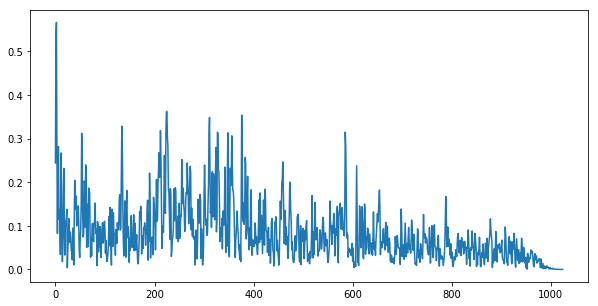

In [15]:
## Plotting random spectral frames

import random

i = random.randint(0,len(spectral_power_frames))

print(i)

plt.figure(figsize=(10,5))
plt.plot(spectral_power_frames[i])
plt.show()

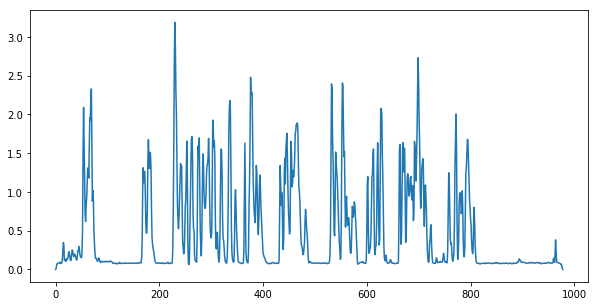

In [16]:
## Plotting average spectral power over time

mean_power_vals = [np.mean(frame_values) for frame_values in spectral_power_frames]

plt.figure(figsize=(10,5))
plt.plot(mean_power_vals)
plt.show()

In [17]:
## Extracting MFCCs

mfcc_frames = librosa.feature.mfcc(sample_array, sample_rate, hop_length=512, n_mfcc=13).T


405


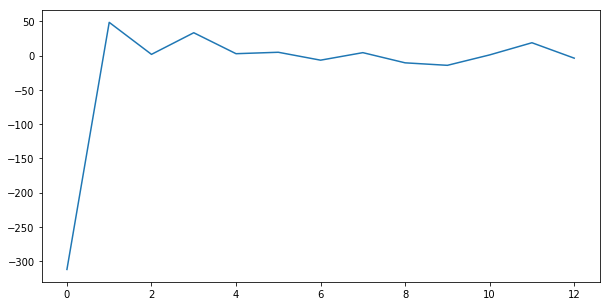

In [20]:
## Plotting random spectral frames

import random

i = random.randint(0,len(mfcc_frames))

print(i)

plt.figure(figsize=(10,5))
plt.plot(mfcc_frames[i])
plt.show()

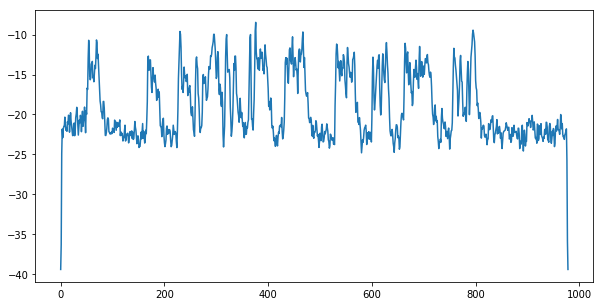

In [21]:
## Plotting average MFCC values over time

mean_mfcc_vals = [np.mean(frame_values) for frame_values in mfcc_frames]

plt.figure(figsize=(10,5))
plt.plot(mean_mfcc_vals)
plt.show()

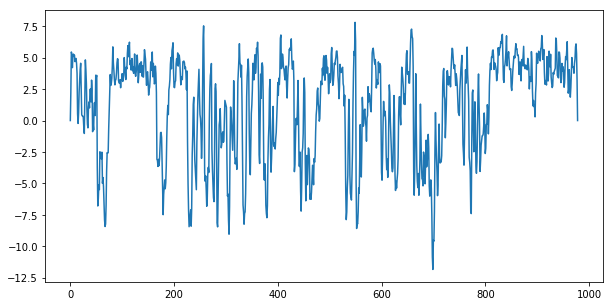

In [22]:
## Plotting average MFCC values over time, excluding 0th coefficient

mean_mfcc_vals = [np.mean(frame_values[1:]) for frame_values in mfcc_frames]

plt.figure(figsize=(10,5))
plt.plot(mean_mfcc_vals)
plt.show()

691


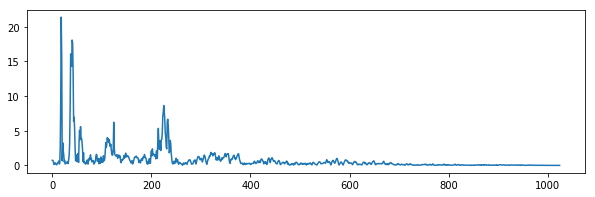

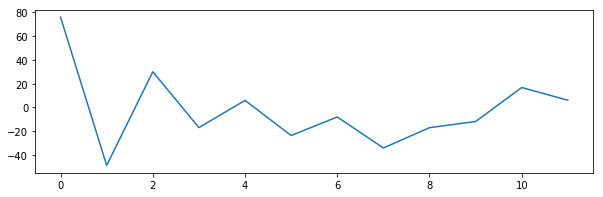

In [31]:
## Comparing spectral and MFCC frames

import random

i = random.randint(0,len(mfcc_frames))

print(i)

plt.figure(figsize=(10,3))
plt.plot(spectral_power_frames[i])
plt.show()

plt.figure(figsize=(10,3))
plt.plot(mfcc_frames[i][1:]) # excluding 0th coefficient
plt.show()

In [ ]:
sample_array[::-1]

In [38]:
list=[1,2,3,4,5,5,6,7,6,2,3,4]

list[::-1]

[4, 3, 2, 6, 7, 6, 5, 5, 4, 3, 2, 1]

Now let's flip it and reverse it. In Python, we can easily reverse the order of a list called `xyz` with the bracket notation `xyz[::-1]`.


In [39]:
librosa.output.write_wav('Reverse_Creeley_The-Warning_61.wav', sample_array[::-1], sample_rate)

Play the new file "Reverse_Creeley_The-Warning_61.wav" in an audio editor.

Now let's add some white noise to the original recording.


In [46]:

noise_array=[]

for sample in sample_array:
    noise_array.append(((random.random()-0.5)*0.1)+sample)

noise_array = np.array(noise_array)

librosa.output.write_wav('Noisy_Creeley_The-Warning_61.wav', noise_array, sample_rate)



68.2944726367385